Minimise ℓ1 Norm with ℓ2 Constraint
====================================

This example demonstrates the use of class [admm.bpdn.MinL1InL2Ball](http://sporco.rtfd.org/en/latest/modules/sporco.admm.bpdn.html#sporco.admm.bpdn.MinL1InL2Ball) to solve the problem

  $$\mathrm{argmin}_\mathbf{x} \| \mathbf{x} \|_1 \; \text{such that} \; \| D \mathbf{x} - \mathbf{s} \|_2 \leq \epsilon$$

where $D$ is the dictionary, $\mathbf{x}$ is the sparse representation, and $\mathbf{s}$ is the signal to be represented. In this example this problem is used to estimate the reference sparse representation that generated a signal from a noisy version of the signal.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco.admm import bpdn
from sporco import plot
plot.config_notebook_plotting()

Configure problem size, sparsity, and noise level.

In [2]:
N = 512      # Signal size
M = 4*N      # Dictionary size
L = 32       # Number of non-zero coefficients in generator
sigma = 0.5  # Noise level

Construct random dictionary, reference random sparse representation, and test signal consisting of the synthesis of the reference sparse representation with additive Gaussian noise.

In [3]:
# Construct random dictionary and random sparse coefficients
np.random.seed(12345)
D = np.random.randn(N, M)
x0 = np.zeros((M, 1))
si = np.random.permutation(list(range(0, M-1)))
x0[si[0:L]] = np.random.randn(L, 1)

# Construct reference and noisy signal
s0 = D.dot(x0)
s = s0 + sigma*np.random.randn(N,1)

Set [admm.bpdn.MinL1InL2Ball](http://sporco.rtfd.org/en/latest/modules/sporco.admm.bpdn.html#sporco.admm.bpdn.MinL1InL2Ball) solver class options. The value of $\epsilon$ is estimated from the difference between the noisy and reference signals.

In [4]:
epsilon = 1.1 * np.linalg.norm(s0 - s)
opt = bpdn.MinL1InL2Ball.Options({'Verbose': True, 'MaxMainIter': 500,
                                  'RelStopTol': 1e-3, 'rho': 1e0,
                                  'AutoRho': {'Enabled': False}})

Initialise and run [admm.bpdn.MinL1InL2Ball](http://sporco.rtfd.org/en/latest/modules/sporco.admm.bpdn.html#sporco.admm.bpdn.MinL1InL2Ball) object

In [5]:
b = bpdn.MinL1InL2Ball(D, s, epsilon, opt)
x = b.solve()

print("MinL1InL2Ball solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       Cnstr     r         s       
--------------------------------------------
   0  0.00e+00  1.15e+02  1.00e+00  4.95e+01
   1  1.72e+02  8.84e+01  3.84e-01  4.92e+01
   2  4.36e+01  3.86e+01  3.34e-01  4.56e+01
   3  7.04e+01  0.00e+00  4.07e-02  1.00e+00
   4  8.06e+01  0.00e+00  1.48e-02  1.00e+00
   5  9.89e+01  0.00e+00  1.51e-02  1.00e+00
   6  8.22e+01  0.00e+00  1.37e-02  1.00e+00
   7  6.56e+01  0.00e+00  1.27e-02  1.00e+00
   8  7.33e+01  0.00e+00  1.29e-02  1.00e+00
   9  6.98e+01  0.00e+00  1.22e-02  1.00e+00
  10  6.39e+01  0.00e+00  1.13e-02  1.00e+00
  11  6.70e+01  0.00e+00  1.08e-02  1.00e+00
  12  6.89e+01  0.00e+00  1.02e-02  1.00e+00
  13  6.67e+01  0.00e+00  9.85e-03  1.00e+00
  14  5.68e+01  0.00e+00  8.73e-03  1.00e+00
  15  5.22e+01  0.00e+00  8.30e-03  1.00e+00
  16  5.59e+01  0.00e+00  8.31e-03  1.00e+00
  17  5.31e+01  0.00e+00  7.63e-03  1.00e+00
  18  5.00e+01  0.00e+00  7.22e-03  1.00e+00
  19  4.89e+01  0.00e+00  6.98e-03  1.00e+00
  20  4.88

 130  2.48e+01  8.66e-05  1.30e-04  2.24e-02
 131  2.48e+01  8.89e-05  1.27e-04  2.18e-02
 132  2.48e+01  9.23e-05  1.24e-04  2.13e-02
 133  2.48e+01  9.33e-05  1.21e-04  2.08e-02
 134  2.48e+01  8.88e-05  1.18e-04  2.04e-02
 135  2.48e+01  7.95e-05  1.16e-04  1.99e-02
 136  2.48e+01  7.15e-05  1.12e-04  1.95e-02
 137  2.48e+01  7.05e-05  1.10e-04  1.91e-02
 138  2.48e+01  7.44e-05  1.07e-04  1.87e-02
 139  2.48e+01  7.88e-05  1.05e-04  1.83e-02
 140  2.47e+01  8.02e-05  1.02e-04  1.79e-02
 141  2.47e+01  7.78e-05  9.94e-05  1.75e-02
 142  2.47e+01  7.19e-05  9.75e-05  1.72e-02
 143  2.47e+01  6.71e-05  9.54e-05  1.68e-02
 144  2.47e+01  6.66e-05  9.27e-05  1.65e-02
 145  2.47e+01  6.83e-05  9.03e-05  1.61e-02
 146  2.47e+01  7.00e-05  8.85e-05  1.58e-02
 147  2.47e+01  7.04e-05  8.65e-05  1.54e-02
 148  2.47e+01  6.91e-05  8.41e-05  1.51e-02
 149  2.47e+01  6.68e-05  8.20e-05  1.48e-02
 150  2.47e+01  6.47e-05  8.02e-05  1.45e-02
 151  2.47e+01  6.40e-05  7.84e-05  1.42e-02
 152  2.47


 272  2.45e+01  8.71e-06  6.90e-06  1.33e-03
 273  2.45e+01  8.50e-06  6.77e-06  1.31e-03
 274  2.45e+01  8.29e-06  6.65e-06  1.28e-03
 275  2.45e+01  8.08e-06  6.54e-06  1.26e-03
 276  2.45e+01  7.91e-06  6.43e-06  1.24e-03
 277  2.45e+01  7.85e-06  6.32e-06  1.22e-03
 278  2.45e+01  7.85e-06  6.21e-06  1.20e-03
 279  2.45e+01  7.83e-06  6.10e-06  1.18e-03
 280  2.45e+01  7.73e-06  6.00e-06  1.15e-03
 281  2.45e+01  7.56e-06  5.90e-06  1.13e-03
 282  2.45e+01  7.37e-06  5.80e-06  1.12e-03
 283  2.45e+01  7.20e-06  5.69e-06  1.10e-03
 284  2.45e+01  7.06e-06  5.59e-06  1.08e-03
 285  2.45e+01  6.94e-06  5.50e-06  1.06e-03
 286  2.45e+01  6.85e-06  5.41e-06  1.04e-03
 287  2.45e+01  6.78e-06  5.32e-06  1.02e-03
 288  2.45e+01  6.69e-06  5.22e-06  1.01e-03
 289  2.45e+01  6.58e-06  5.13e-06  9.88e-04
--------------------------------------------
MinL1InL2Ball solve time: 0.43s


Plot comparison of reference and recovered representations.

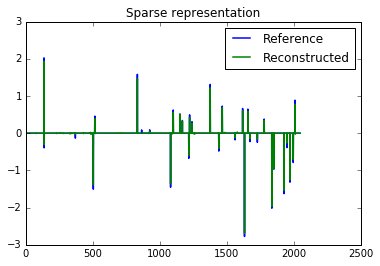

In [6]:
plot.plot(np.hstack((x0, x)), title='Sparse representation',
          lgnd=['Reference', 'Reconstructed'])

Plot functional value, residuals, and rho

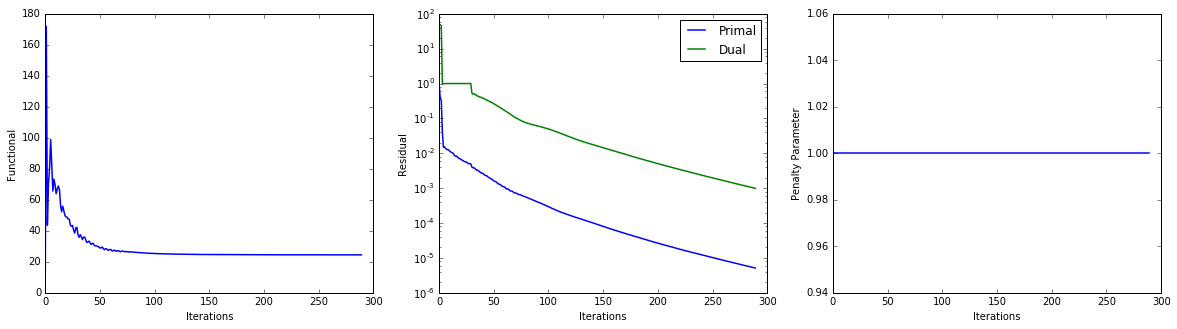

In [7]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()